<font size="6"><b>Unsupervised Learning : K-means Clustering</b></font>

Table of Contents
<div id="toc"></div>

# 1. Supervised vs. Unsupervised Learning
- Supervised: building a model from labeled data
- Unsupervised: clustering from unlabeled data

<font size='4'>Supervised Learning</font>


<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/01.bmp", width=400>
        </td>
        <td width = 48%>
            $$ \begin{array}{Icr}
            \{x^{(1)},x^{(2)},\cdots,x^{(m)}\}\\
            \{y^{(1)},y^{(2)},\cdots,y^{(m)}\}
            \end{array} \quad \Rightarrow \quad \text{Classification}$$
        </td>
    </tr>
</table>

<font size='4'>Unsupervised Learning</font>

- Data clustering is an unsupervised learning problem

- Given: 
 - $m$ unlabeled examples $\{x^{(1)},x^{(2)}\cdots, x^{(m)}\}$
 - the number of partitions $k$


- Goal: group the examples into $k$ partitions

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/02.bmp", width = 400>
        </td>
        <td width = 48%>
            $$\{x^{(1)},x^{(2)},\cdots,x^{(m)}\} \quad \Rightarrow \quad \text{Clustering}$$
        </td>
    </tr>
</table>

- the only information clustering uses is the similarity between examples

- clustering groups examples based of their mutual similarities

- A good clustering is one that achieves:
    - high within-cluster similarity
    - low inter-cluster similarity


- it is a "chicken and egg" problem (dilemma)
    - Q: if we knew $c_i's$, how would we determine which points to associate with each cluster center?
    - A: for each point $x^{(i)}$, choose closest $c_i$
    <br><br>    
    - Q: if we knew the cluster memberships, how do we get the centers?
    - A: choose $c_i$ to be the mean of all points in the cluster

# 2. K-means

## 2.1. (Iterative) Algorithm
<br>
<font size='4'><b>1) K-means Clustering Step - Initialization</b></font>

Input:
- $k$: the number of clusters
- Training set $\{x^{(1)},x^{(2)},\cdots,x^{(m)}\}$

Randomly initialized anywhere in $\mathbb{R}^n$
<br>
<img src="./image_files/003.png", width = 600>
<br>

<font size='4'><b>2) K-means Clustering Step - Iteration</b></font>
<br>
<img src="./image_files/004.png", width = 600>

$$
\begin{align*}
c_k &= \{n: k = \arg \min_k \lVert x_n - \mu_k \rVert^2\}\\
\mu_k &= \frac{1}{\lvert c_k \rvert} \sum_{n \in c_k}x_n
\end{align*}
$$

Repeat until convergence (a possible convergence criteria: cluster centers do not change anymore)

<font size='4'><b>3) K-means Clustering Step - Output</b></font>

Output: model
- $c$ (label): index (1 to $k$) of cluster centroid $\{c_1,c_2,\cdots,c_k\}$
- $\mu$ : averages (mean) of points assigned to cluster $\{\mu_1,\mu_2,\cdots,\mu_k\}$

<br>
<img src="./image_files/005.png", width=350>
<br>

In [1]:
%%html
<iframe src="./image_files/11 print.pdf", width=700 height=500></iframe>

## 2.3. Summary: K-means Algorithm


$
\,\text{Randomly initialize } k \,\text{cluster centroids } \mu_1,\mu_2,\cdots,\mu_k \in \mathbb{R}^n$

$
\begin{align*}
\text{Repeat}&\{ \\
&\text{for $i=1$ to $m$} \\    
&\quad \text{$c_i$ := index (from 1 to $k$) of cluster centroid closet to $x^{(i)}$} \\     
&\text{for $k=1$ to $k$} \\
&\quad \text{$\mu_k$ := average (mean) of points assigned to cluster $k$} \\
&\}
\end{align*}
$

## 2.4. K-means Optimization Point of View

- $c_i$= index of cluster $(1,2,\cdots,k)$ to which example $x^{(i)}$ is currently assigned
- $\mu_k$= cluster centroid $k$ ($\mu_k \in \mathbb{R}^n$)
- $\mu_{c_i}$= cluster centroid of cluster to which example $x^{(i)}$ has been assigned



- Optimization objective:

$$ J(c_1,\cdots,c_m,\mu_1,\cdots,\mu_k) = \frac{1}{m}\sum\limits_{i=1}^m \lVert x^{(i)}-\mu_{c_i}\rVert^2$$

$$ \min\limits_{c_1,\cdots,c_m, \; \mu_1,\cdots,\mu_k} J(c_1,\cdots,c_m,\mu_1,\cdots,\mu_k)$$

# 3. Matlab code

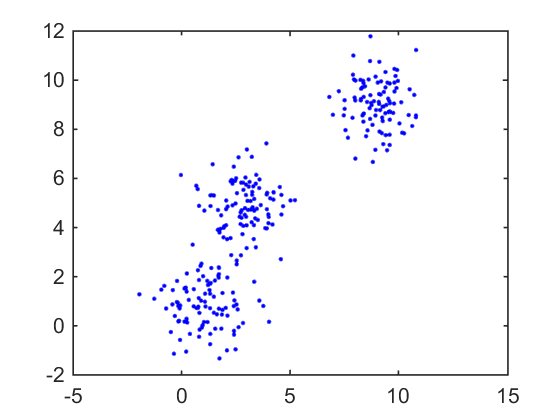

In [1]:
% data generation

group1 = mvnrnd([1 1],eye(2),100);
group2 = mvnrnd([3 5],eye(2),100);
group3 = mvnrnd([9 9],eye(2),100);
X = [group1; group2; group3];

plot(X(:,1),X(:,2),'b.')

## 3.1. K-means clustering

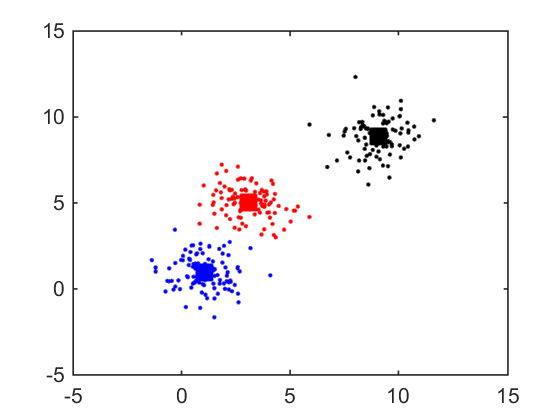

In [51]:
% Number of cluster and data
k = 3;
m = length(X);

% ramdomly initialize mean points
r = randi([1 m],k,1);
mu = X(r,:);
pre_mu = mu;

% Run K-means
for j = 1:500     
    % Cluster assignment
    d = [];
    for i = 1:k
        d = [d sum((X - repmat(mu(i,:),m,1)).^2,2)];            
    end
    [~,c] = min(d,[],2);

    % Update centroid
    for i = 1:k
        mu(i,:) = mean(X(c == i,:),1);
    end

    if sum(sum(abs(pre_mu-mu))) < 1e-5
        break;
    else
        pre_mu = mu;
    end
end

% Plot the result
figure(1); clf, hold on
plot(X(c == 1,1),X(c == 1,2),'r.'); hold on
plot(mu(1,1),mu(1,2),'rs','MarkerFaceColor','r','MarkerSize',10)
plot(X(c == 2,1),X(c == 2,2),'b.');
plot(mu(2,1),mu(2,2),'bs','MarkerFaceColor','b','MarkerSize',10)
plot(X(c == 3,1),X(c == 3,2),'k.');
plot(mu(3,1),mu(3,2),'ks','MarkerFaceColor','k','MarkerSize',10)
box on

## K-means: Initialization issues


- k-means is extremely senstitive to cluster center initialization


- Bad initialization can lead to
    - Poor convergence speed
    - Bad overall clustering


- Safeguarding measures:
    - Choose first center as one of the examples, second which is the farthest from the first, third which is the farthest from both, and so on.
    - Try multiple initialization and choose the best result
    

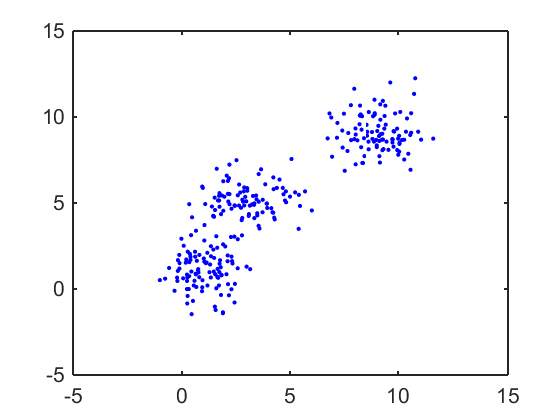

In [20]:
% data generation
group1 = mvnrnd([1 1],eye(2),100);
group2 = mvnrnd([3 5],eye(2),100);
group3 = mvnrnd([9 9],eye(2),100);
X = [group1; group2; group3];

plot(X(:,1),X(:,2),'b.')

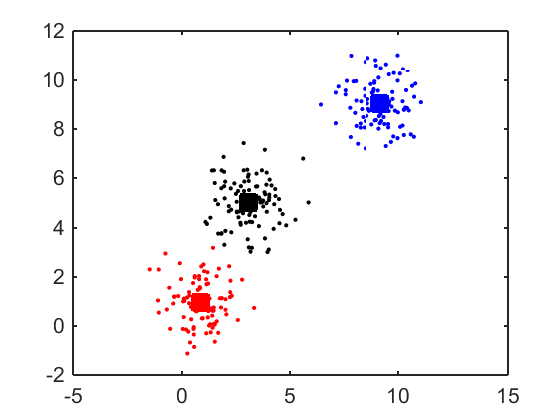

In [13]:
%%
C = [];
J = [];
MU = [];

k = 3;
m = length(X);

% Randomly initialize 100 times
for iter = 1:100
    r = randi([1 m],k,1);    
    mu = X(r,:);
    pre_mu = mu;

    for j = 1:500     
        % Cluster assignment
        d = [];
        for i = 1:k
            d = [d sum((X - repmat(mu(i,:),m,1)).^2,2)];            
        end
        [~,c] = min(d,[],2);

        % Update centroid
        for i = 1:k
            mu(i,:) = mean(X(c == i,:),1);
        end

        if sum(sum(abs(pre_mu-mu))) < 1e-5
            break;
        else
            pre_mu = mu;
        end
    end
    
    % Compute cost
    cost = 0;
    for i = 1:k
        cost = cost + sum(sum((X(c == i,:) - repmat(mu(i,:),sum(c == i),1)).^2,2));           
    end
    cost = cost/m;
    
    % Find minimum cost and corresponding mu and c
    if iter == 1
        C = c;
        J = cost;
        MU = mu;
    elseif cost < J
        C = c;
        J = cost;
        MU = mu;
    end
end

% Plot the result
figure(1); clf, hold on
plot(X(C == 1,1),X(C == 1,2),'r.'); hold on
plot(MU(1,1),MU(1,2),'rs','MarkerFaceColor','r','MarkerSize',10)
plot(X(C == 2,1),X(C == 2,2),'b.');
plot(MU(2,1),MU(2,2),'bs','MarkerFaceColor','b','MarkerSize',10)
plot(X(C == 3,1),X(C == 3,2),'k.');
plot(MU(3,1),MU(3,2),'ks','MarkerFaceColor','k','MarkerSize',10)
box on

Matlab embedded `kmeans` function

`help kmeans`

```octave
KMEANS K-means clustering.
    IDX = KMEANS(X, K) partitions the points in the N-by-P data matrix X
    into K clusters.  This partition minimizes the sum, over all clusters, of
    the within-cluster sums of point-to-cluster-centroid distances.  Rows of X
    correspond to points, columns correspond to variables.  Note: when X is a
    vector, KMEANS treats it as an N-by-1 data matrix, regardless of its
    orientation.  KMEANS returns an N-by-1 vector IDX containing the cluster
    indices of each point.  By default, KMEANS uses squared Euclidean
    distances.
 
    KMEANS treats NaNs as missing data, and ignores any rows of X that
    contain NaNs.
 
    [IDX, C] = KMEANS(X, K) returns the K cluster centroid locations in
    the K-by-P matrix C.
```

## 3.2. Choosing the Number of Clusters

- Idea: when adding another cluster does not give much better modeling of the data

- One way to select $k$ for the K-means algorithm is to try different values of $k$, plot the K-means objective versus $k$, and look at the '<font color='green'>elbow-point</font>' in the plot

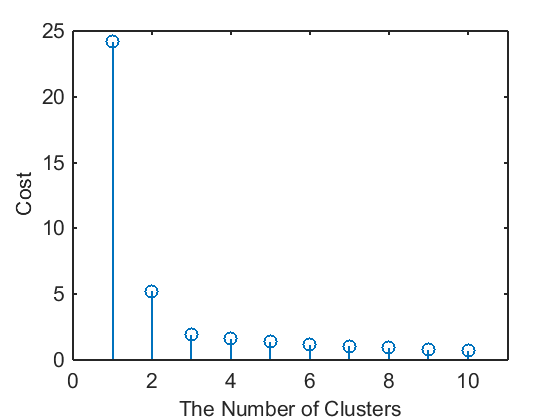

In [21]:
% data generation
group1 = mvnrnd([1 1],eye(2),100);
group2 = mvnrnd([3 5],eye(2),100);
group3 = mvnrnd([9 9],eye(2),100);
X = [group1; group2; group3];

%%
K = 10;
Q = [];

for k = 1:K
    [c,mu] = kmeans(X,k,'replicates',5);
    cost = 0;
    for i = 1:k
        cost = cost + sum(sum((X(c == i,:) - repmat(mu(i,:),sum(c == i),1)).^2,2));           
    end
    cost = cost/length(X);
    Q = [Q cost];
end

% Plot the result
stem(Q)
xlim([0 11])
xlabel('The Number of Clusters','FontSize',10)
ylabel('Cost','FontSize',10)

## K-means: Limitations

- Make <font color='red'>hard assignments</font> of points to clusters
    - A point either completely belongs to a cluster or not belongs at all
    - No notion of a <font color='green'>soft assignment</font> (_i.e._, probability of being assigned to each cluster)
    - Gaussian mixture model (we will study later) and Fuzzy K-means allow soft assignments


- Sensitive to outlier examples (such example can affect the mean by a lot)
    - <font color='green'>K-medians</font> algorithm is a more robust alternative for data with outliers


- Works well only for round shaped, and of roughly equal sizes/density cluster


- Does badly if the cluster have non-convex shapes
    - Spectral clustering (we will study later) and Kernelized K-means can be an alternative


- Non-convex/non-round-shaped cluster: standard K-means fails !
<br>
<img src="./image_files/non-convex.png", width = 600>


- Clusters with different densities
<br>
<img src="./image_files/different_densities.png", width = 600>

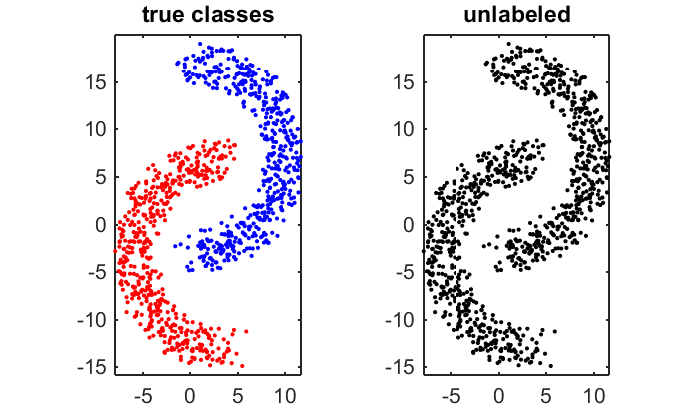

In [23]:
%plot -s 700,420
% data generation
r = 10;

x1c = [-2 5];
x2c = [2 -5];

theta = linspace(-pi/2,pi/2,500)';

x1 = x1c(1) + r*cos(theta);
y1 = x1c(2) + r*sin(theta);

x2 = x2c(1) + r*cos(theta+pi);
y2 = x2c(2) + r*sin(theta);

noise = 4;
m = size(theta);

x1 = x1 + noise*rand(m);
y1 = y1 + noise*rand(m);
x2 = x2 + noise*rand(m);
y2 = y2 + noise*rand(m);

X = [[x1 y1];[x2 y2]];

subplot(1,2,1), plot(x1,y1,'b.',x2,y2,'r.')
title('true classes')
axis equal

subplot(1,2,2), plot(X(:,1),X(:,2),'k.')
title('unlabeled')
axis equal

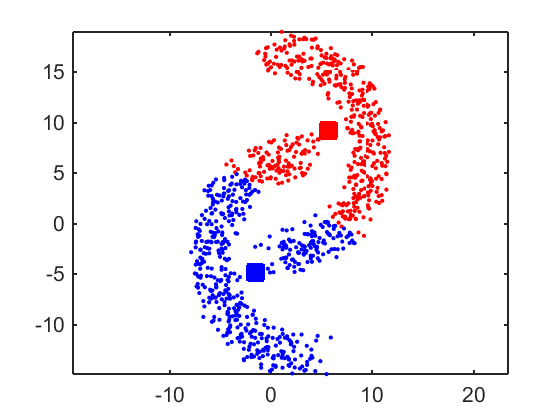

In [24]:
%plot -s 560,420
[c,mu]  = kmeans(X,2,'replicates',5);

% Plot the result
plot(X(c == 1,1),X(c == 1,2),'r.'); hold on
plot(mu(1,1),mu(1,2),'rs','MarkerFaceColor','r','MarkerSize',10)
plot(X(c == 2,1),X(c == 2,2),'b.');
plot(mu(2,1),mu(2,2),'bs','MarkerFaceColor','b','MarkerSize',10), hold off
axis equal, box on

We will study the spectural clustering (or partitioning) with a network theory to overcome this k-means' limitation.

# Examples

1) Image compression

- whiteboard handwriting

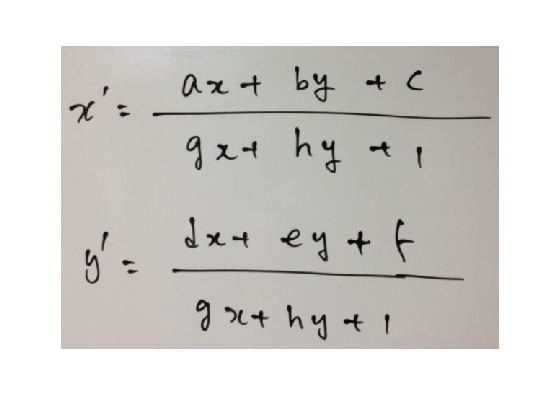

In [35]:
im = imread([pwd,'\image_files\handwriting_whiteboard.png']);
row = length(im(:,1,1));
col = length(im(1,:,1));

imshow(im)

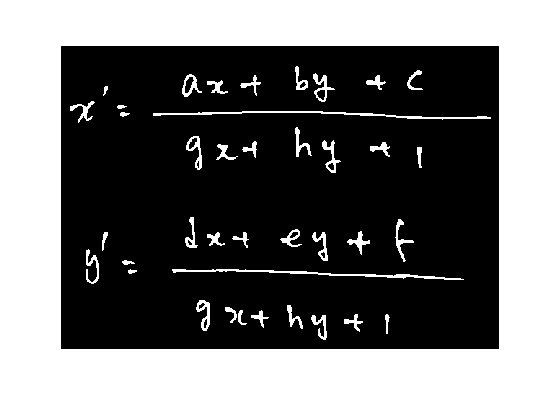

In [37]:
%% k-menas
X = double(reshape(im,row*col,3));
[C,mu] = kmeans(X,2);

c = reshape(C,row,col);
imshow(c-1)
% imshow(1-(c-1))

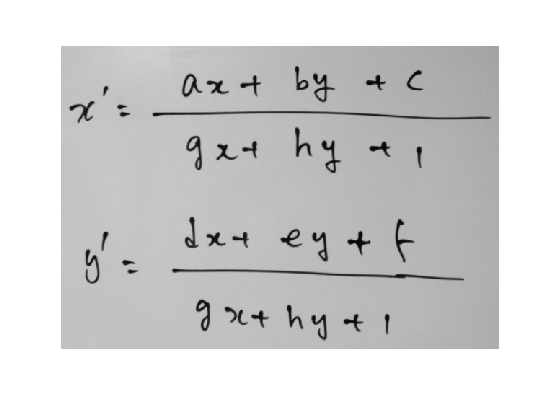

In [32]:
% much easier way

grayim = rgb2gray(im);
imshow(grayim);

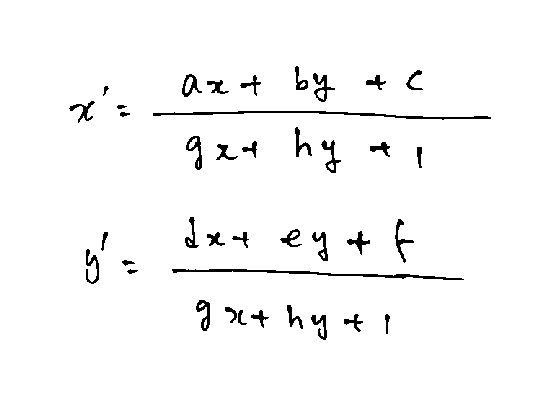

In [33]:
% simple threshold

bwim = (grayim > 255/2);
imshow(bwim)

- Use only 16 colors (color-based, rgb)
    - will be a homework problem
    - source: [ML class](http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex9/ex9.html) by Prof. Andrew Ng at Stanford Univ.

<table>
<tr>
<td>
<img src="image_files/06.bmp",width="300">
</td>
<td>
<img src="image_files/07.bmp",width="300">
</td>
</tr>
</table>

2) Image segmentation





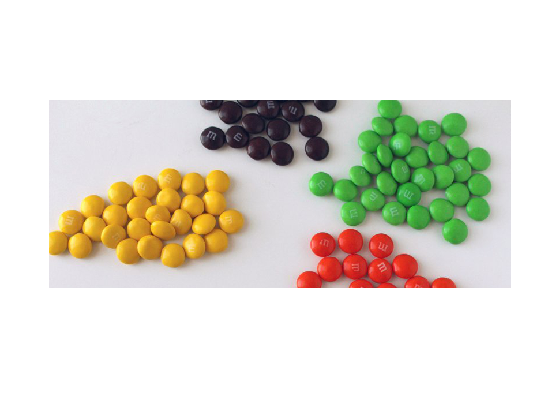

In [3]:
im = imread([pwd,'\image_files\testimage.jpg']);
imshow(im)

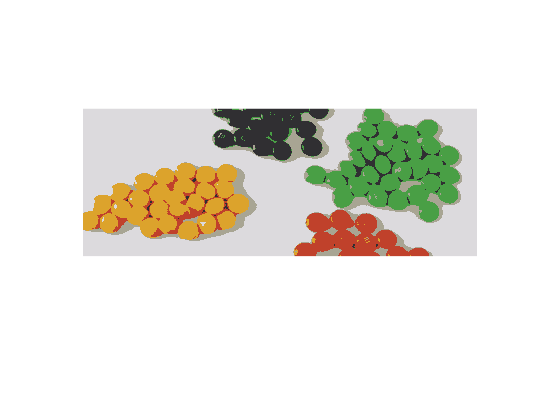

In [6]:
im = imresize(im,[150 400]);

height = size(im,1);
width = size(im,2);

X = double(reshape(im,height*width,3));

% k = 5;
k = 6;

[c,mu] = kmeans(X,k);

seg_X = zeros(height*width,3);
for i = 1:k
    seg_X(c == i,:) = repmat(round(mu(i,:)),sum(c == i),1);
end

seg_im = uint8(reshape(seg_X,height,width,3));
imshow(seg_im)

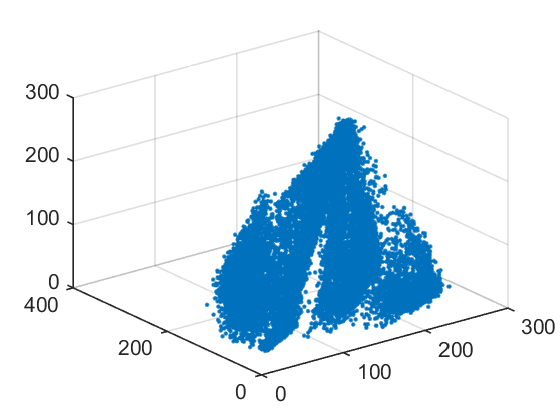

In [7]:
plot3(X(:,1),X(:,2),X(:,3),'.'), grid on

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>